In this notebook we are going to discuss the efficiency of lepton jet reconstruction efficiency w.r.t dark photon transverse decay length. But here we are separating the egamma type lepton jet into electron type and photon type.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"2mu2e",
        #"baseNoLj_highPtA",
        "baseNoLj_eLj",
        "baseNoLj_gLj",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In the following plots describe:
1) How many of the dark photons decaying to electrons which has egamma type lepton jet nearby
2) How many of the dark photons decaying to electrons which has electron tyoe lepton jet nearby
3) How many of the dark photons decaying to electrons which has photon type lepton jet nearby

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

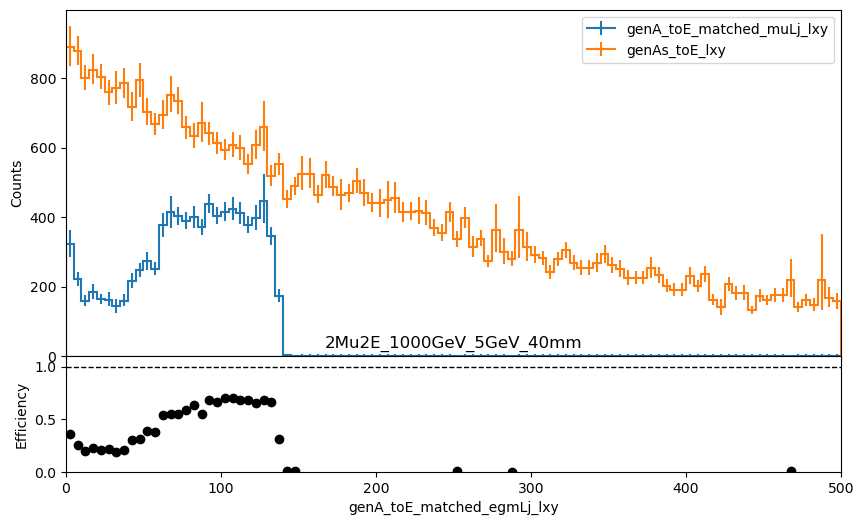

In [10]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_muLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

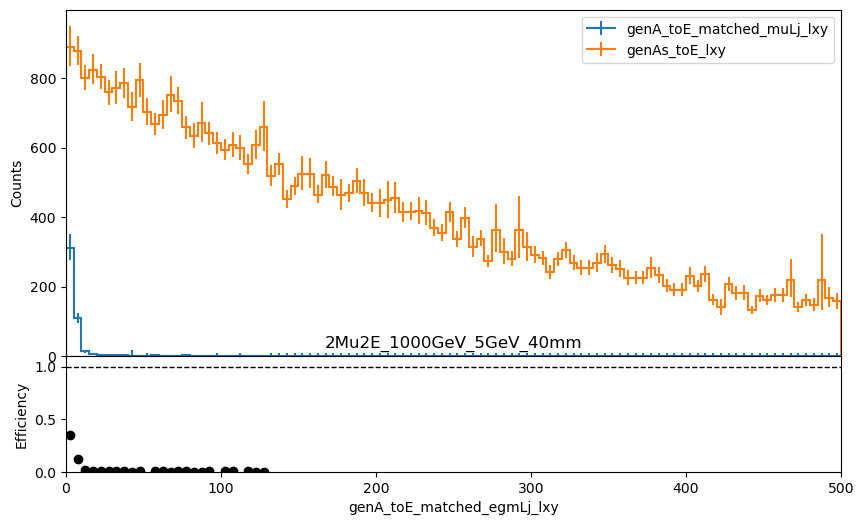

In [8]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label="genA_toE_matched_muLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

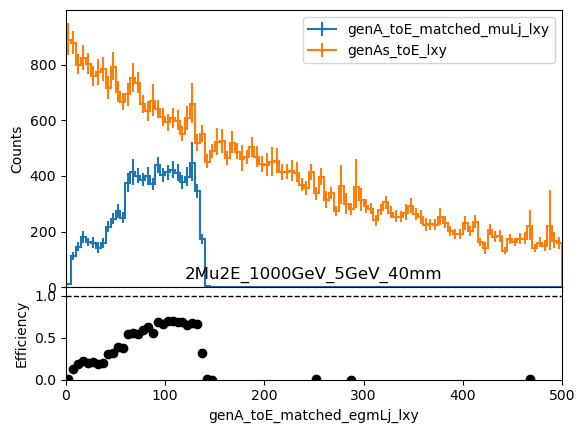

In [11]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label="genA_toE_matched_muLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

We observe the following from the above plots:
1)Most of the efficiency we see in the first plot is because of the reconstruction of photon type lj
2)The efficiency of the dark photon decaying to electron with e-type lepton jet nearby decreases as the Lxy increases. Also the value goes to zero as the lxy reaches 10 or 15 cm.
3)The efficiency of the dark photon with photon type lepton jet increases as the lxy increases. Most of the efficiency we see in the first plot is coming from the photon type ljs. The valuses increases a little bit, the stay constant for a while, then increases again and goes to zero as the the lxy hits the electron calorimeter. 